In [11]:
from pathlib import Path
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt

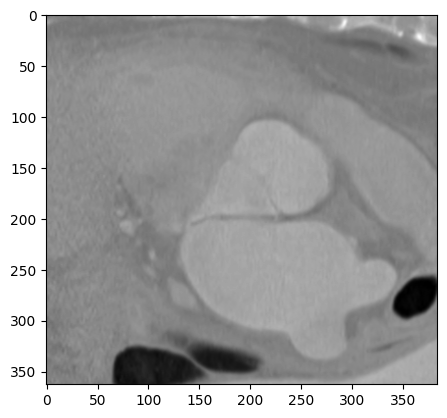

In [23]:
ref_image_path = Path("/media/F/sj/Data/Shanghai_139_partial/ref_image/WHS.nii.gz")
ref_image = nib.load(ref_image_path)
ref_coronary.affine

data = coronary.get_fdata()
X, Y, Z = data.shape

plt.imshow(data[X//2, :, :], cmap="gray")
plt.show()

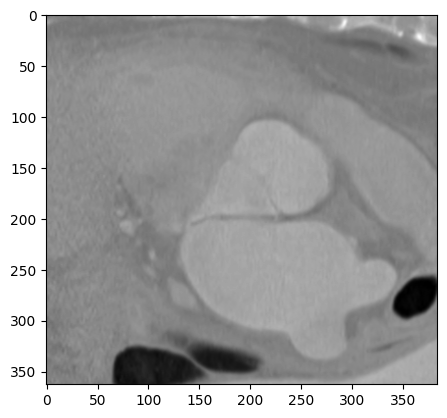

In [24]:
image_path = Path("/media/F/sj/Data/Shanghai_139_partial/image/00001.nii.gz")
image = nib.load(image_path)
image.affine

data = image.get_fdata()
X, Y, Z = data.shape

plt.imshow(data[X//2, :, :], cmap="gray")
plt.show()

In [ ]:
image_dir = Path("/media/F/sj/Data/Shanghai_139_partial/image")
output_dir = Path("/media/F/sj/Data/Shanghai_139_partial/re_affined_image")

for file in sorted(image_dir.glob("*.nii.gz")):
    image = nib.load(file)
    new_image = nib.Nifti1Image(image.get_fdata(), affine=np.diag([-0.46, 0.46, 0.40, 1]))
    print(new_image.affine)
    new_path = output_dir / file.name
    print(new_path)
    nib.save(new_image, new_path)

[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_image/00001.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_image/00002.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_image/00003.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_image/00004.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_image/00005.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media

In [9]:
coronary_dir = Path("/media/F/sj/Data/Shanghai_139_partial/coronary")
output_dir = Path("/media/F/sj/Data/Shanghai_139_partial/re_affined_coronary")

for file in sorted(coronary_dir.glob("*.nii.gz")):
    coronary = nib.load(file)
    new_coronary = nib.Nifti2Image(coronary.get_fdata().astype(np.uint8), affine=np.diag([-0.46, 0.46, 0.40, 1]))
    print(new_coronary.affine)
    new_path = output_dir / file.name
    print(new_path)
    nib.save(new_coronary, new_path)

[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_coronary/00001.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_coronary/00002.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_coronary/00003.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_coronary/00004.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.    1.  ]]
/media/F/sj/Data/Shanghai_139_partial/re_affined_coronary/00005.nii.gz
[[-0.46  0.    0.    0.  ]
 [ 0.    0.46  0.    0.  ]
 [ 0.    0.    0.4   0.  ]
 [ 0.    0.    0.  

In [13]:
import numpy as np
from scipy import ndimage as ndi
from skimage.morphology import ball, binary_opening, binary_closing
from skimage.measure import label, regionprops

def process_multilabel_array(arr: np.ndarray, radius: int = 2) -> np.ndarray:
    """
    对多标签 3D 数组执行形态学处理:
    1. 闭运算 (填充空洞)
    2. 开运算 (去掉过细部分)
    3. 保留最大连通域
    """
    assert arr.ndim == 3, "输入必须是3D数组"

    result = np.zeros_like(arr, dtype=arr.dtype)
    struct = ball(radius)  # 结构元素，半径可调

    labels = np.unique(arr)
    labels = labels[labels != 0]  # 跳过背景

    for lbl in labels:
        mask = (arr == lbl)

        # 1. 闭运算 (填充小洞)
        mask = binary_closing(mask, struct)

        # 2. 开运算 (去掉细小连接)
        mask = binary_opening(mask, struct)

        # 3. 保留最大连通域
        labeled = label(mask, connectivity=1)
        if labeled.max() == 0:
            continue
        regions = regionprops(labeled)
        largest_region = max(regions, key=lambda r: r.area)
        mask = (labeled == largest_region.label)

        # 将结果叠加回去
        result[mask] = lbl

    return result



pred_dir = Path("/media/F/sj/Data/Shanghai_139_partial/nnUNet_predict")

cavity_dir = Path("/media/F/sj/Data/Shanghai_139_partial/cavity")

for file in sorted(pred_dir.glob("*.nii.gz")):
    image = nib.load(file)
    data = image.get_fdata() 
    data[data>5] = 0
    data = process_multilabel_array(data)
    new_label = nib.Nifti1Image(data.astype(np.uint8), affine=image.affine)
    cavity_path = cavity_dir / f"{file.name.split('_')[0]}.nii.gz"
    print(cavity_path)
    nib.save(new_label, cavity_path)
    

/media/F/sj/Data/Shanghai_139_partial/cavity/00001.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00002.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00003.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00004.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00005.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00006.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00007.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00008.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00009.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00010.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00011.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00012.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00013.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00014.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00015.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00016.nii.gz
/media/F/sj/Data/Shanghai_139_partial/cavity/00017.nii.gz
/media/F/sj/Da